# Default of Credit Card Clients

The variables available in the dataset are the following:<br><br>

- <b>ID</b>: ID of each client<br><br>

- <b>LIMIT_BAL</b>: Amount of given credit in NT dollars (includes individual and family/supplementary credit)<br><br>

- <b>SEX</b>: Gender (1=male, 2=female)<br><br>

- <b>EDUCATION</b>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br><br>

- <b>MARRIAGE</b>: Marital status (1=married, 2=single, 3=others)<br><br>

- <b>AGE</b>: Age in years<br><br>

- <b>PAY_0</b>: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br><br>

- <b>PAY_2</b>: Repayment status in August, 2005 (scale same as above)<br><br>

- <b>PAY_3</b>: Repayment status in July, 2005 (scale same as above)<br><br>

- <b>PAY_4</b>: Repayment status in June, 2005 (scale same as above)<br><br>

- <b>PAY_5</b>: Repayment status in May, 2005 (scale same as above)<br><br>

- <b>PAY_6</b>: Repayment status in April, 2005 (scale same as above)<br><br>

- <b>BILL_AMT1</b>: Amount of bill statement in September, 2005 (NT dollar)<br><br>

- <b>BILL_AMT2</b>: Amount of bill statement in August, 2005 (NT dollar)<br><br>

- <b>BILL_AMT3</b>: Amount of bill statement in July, 2005 (NT dollar)<br><br>

- <b>BILL_AMT4</b>: Amount of bill statement in June, 2005 (NT dollar)<br><br>

- <b>BILL_AMT5</b>: Amount of bill statement in May, 2005 (NT dollar)<br><br>

- <b>BILL_AMT6</b>: Amount of bill statement in April, 2005 (NT dollar)<br><br>

- <b>PAY_AMT1</b>: Amount of previous payment in September, 2005 (NT dollar)<br><br>

- <b>PAY_AMT2</b>: Amount of previous payment in August, 2005 (NT dollar)<br><br>

- <b>PAY_AMT3</b>: Amount of previous payment in July, 2005 (NT dollar)<br><br>

- <b>PAY_AMT4</b>: Amount of previous payment in June, 2005 (NT dollar)<br><br>

- <b>PAY_AMT5</b>: Amount of previous payment in May, 2005 (NT dollar)<br><br>

- <b>PAY_AMT6</b>: Amount of previous payment in April, 2005 (NT dollar)<br><br>

- <b>default.payment.next.month</b>: Default payment (1=yes, 0=no)


I decided to study the probability of default of credit cards clients by utilizing the dataset available at the following website: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

In [3]:
path <- "/Users/matteomontrucchio/Desktop/credit_card.csv"

dataset <- read.csv(path)
head(dataset)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [4]:
dimension <- function(data) {
    
    num_rows <- nrow(data)
    num_columns <- ncol(data)
    
    cat("Number of rows:", num_rows, "\n")
    cat("Number of columns:", num_columns, "\n")
}

In [5]:
dimension(dataset)

Number of rows: 30000 
Number of columns: 25 


In [6]:
library(dplyr)


Caricamento pacchetto: 'dplyr'


I seguenti oggetti sono mascherati da 'package:stats':

    filter, lag


I seguenti oggetti sono mascherati da 'package:base':

    intersect, setdiff, setequal, union




In [7]:
dataset <- dataset %>%
  mutate_at(vars(SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default.payment.next.month), as.factor) %>%
  rename(PAY_1 = PAY_0, def_pay = default.payment.next.month)

In [8]:
summary(dataset)

       ID          LIMIT_BAL       SEX       EDUCATION MARRIAGE 
 Min.   :    1   Min.   :  10000   1:11888   0:   14   0:   54  
 1st Qu.: 7501   1st Qu.:  50000   2:18112   1:10585   1:13659  
 Median :15000   Median : 140000             2:14030   2:15964  
 Mean   :15000   Mean   : 167484             3: 4917   3:  323  
 3rd Qu.:22500   3rd Qu.: 240000             4:  123            
 Max.   :30000   Max.   :1000000             5:  280            
                                             6:   51            
      AGE            PAY_1           PAY_2           PAY_3      
 Min.   :21.00   0      :14737   0      :15730   0      :15764  
 1st Qu.:28.00   -1     : 5686   -1     : 6050   -1     : 5938  
 Median :34.00   1      : 3688   2      : 3927   -2     : 4085  
 Mean   :35.49   -2     : 2759   -2     : 3782   2      : 3819  
 3rd Qu.:41.00   2      : 2667   3      :  326   3      :  240  
 Max.   :79.00   3      :  322   4      :   99   4      :   76  
                 (Other):

In [9]:
checkna <- function(data) {
    
    na_tot <- sum(is.na(data))
    cat("The total number of NA is ", na_tot)
    if (na_tot != 0) {
       na_columns <- colSums(is.na(data))
       cat("The number of NA for each column: ", na_columns) 
    }
}

In [10]:
checkna(dataset)

The total number of NA is  0

In [11]:
library(ggplot2)
library(gridExtra)


Caricamento pacchetto: 'gridExtra'


Il seguente oggetto `e mascherato da 'package:dplyr':

    combine




# A tibble: 2 x 3
  def_pay count percentage
  <fct>   <int>      <dbl>
1 0       23364       77.9
2 1        6636       22.1


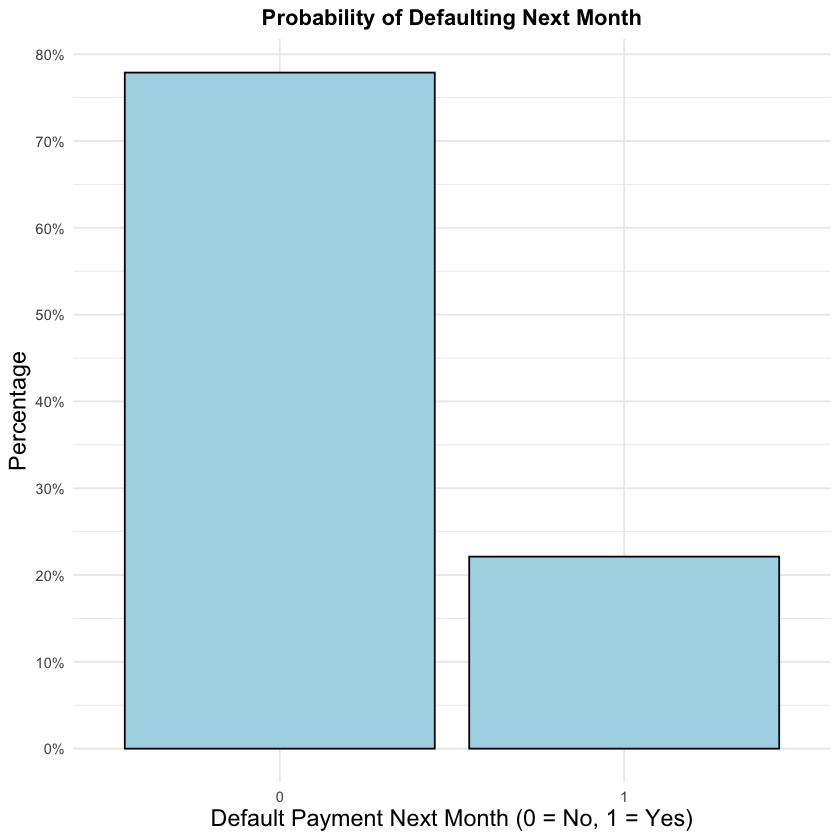

In [16]:
ggplot(data = dataset, aes(x = def_pay)) +
  geom_bar(aes(y = (after_stat(count))/sum(after_stat(count))), fill = "lightblue", color = "black") +
  scale_y_continuous(
    labels = scales::percent_format(accuracy = 1),
    breaks = seq(0, 1, by = 0.1)
  ) +
  labs(
    title = "Probability of Defaulting Next Month",
    x = "Default Payment Next Month (0 = No, 1 = Yes)",
    y = "Percentage"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14), 
    axis.title.y = element_text(size = 14) 
  )

percentage_summary <- dataset %>%
  group_by(def_pay) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

print(percentage_summary)

The dataset shows how 77.9% of clients are not expected to default payment in the next month whereas 22.1% will default payment.

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


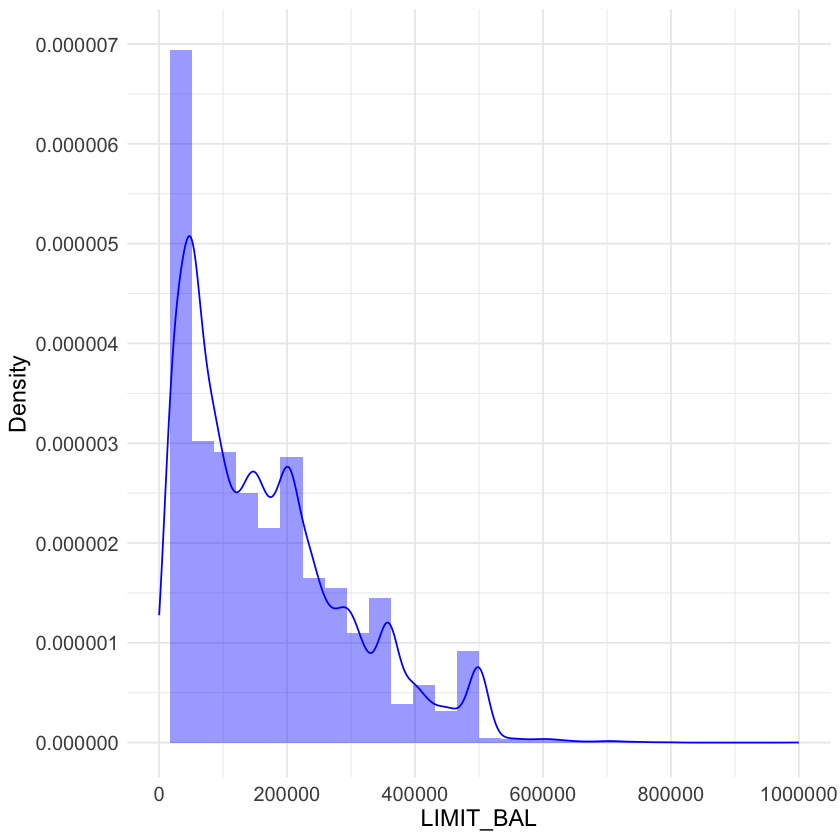

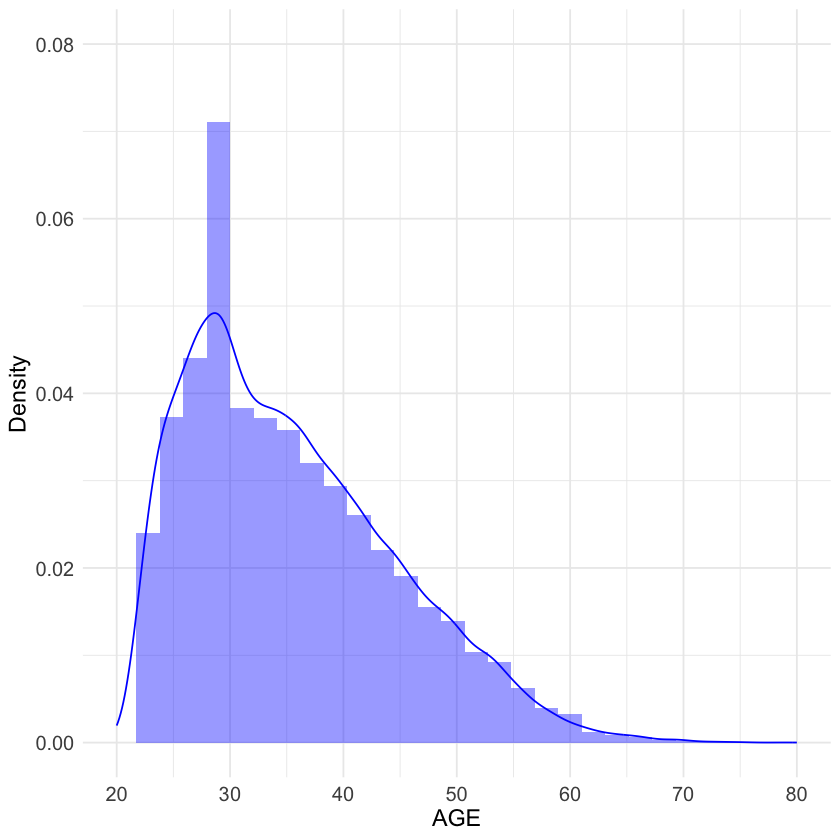

In [12]:
old_scipen <- getOption("scipen")
options(scipen = 999)

limitbal <- ggplot(dataset, aes(x = LIMIT_BAL)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.4) +
  geom_density(color = "blue") +
  theme_minimal() +
  labs(x = "LIMIT_BAL", y = "Density") +
  scale_x_continuous(limits = c(0, 1000000), breaks = seq(0, 1000000, by = 200000)) +
  scale_y_continuous(limits = c(0.000000, 0.000007), breaks = seq(0.000000, 0.000007, 0.000001)) +
  theme(axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12), axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14))

age <- ggplot(dataset, aes(x = AGE)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.4) +
  geom_density(color = "blue") +
  theme_minimal() +
  labs(x = "AGE", y = "Density") +
  scale_x_continuous(limits = c(20, 80), breaks = seq(20, 80, by = 10)) +
  scale_y_continuous(limits = c(0.00, 0.08), breaks = seq(0.00, 0.08, 0.02)) +
  theme(axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12), axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14))

print(limitbal)
print(age)


The two graphs above shows the dataset is skewed when considering the continuous variables. 
There are more clients having limiting balance between 0 to 200000 currency and and age between 20 and 40 years old.

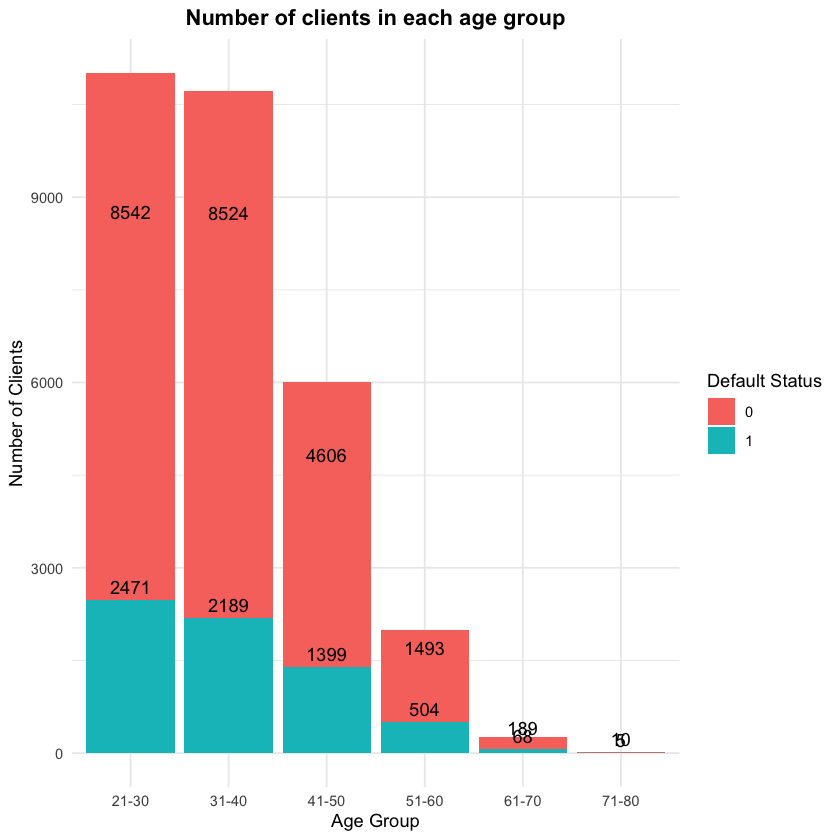

In [13]:
dataset <- dataset %>%
  mutate(AgeGroup = cut(AGE, breaks = c(20, 30, 40, 50, 60, 70, 80), 
                        labels = c("21-30", "31-40", "41-50", "51-60", "61-70", "71-80")))

ggplot(data = dataset, aes(x = AgeGroup, fill = def_pay)) +
  geom_bar(position = "stack") +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  labs(title = "Number of clients in each age group",
       x = "Age Group",
       y = "Number of Clients",
       fill = "Default Status") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

The majority of the clients are inside the age groups 21-30 and 31-40.
In the first two groups, we see that the proportion between clients who will default in the next month and the total number of clients in that age group is around 22%. For the group age 41-50 is 23% and in the group 51-60 is 25%: we may say from the graph that an increase in age will lead to a higher chance of default.

I will now run a regression model to identify the probability of defaulting the next payment given all the feautures in the dataset.  

## Regression

In [21]:
install.packages("caret")
install.packages("e1071")
library(caret)
library(e1071)


si installano anche le dipendenze 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'timeDate', 'foreach', 'ModelMetrics', 'pROC', 'recipes'





I pacchetti binari scaricati sono in
	/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T//RtmpWbkm6h/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T//RtmpWbkm6h/downloaded_packages


Caricamento del pacchetto richiesto: lattice



In [22]:
set.seed(42)

trainIndex <- createDataPartition(dataset$def_pay, p = 0.8, list = FALSE, times = 1)

trainData <- dataset[trainIndex, ]
testData <- dataset[-trainIndex, ]

X_train <- trainData[, -which(names(trainData) == "def_pay")]
y_train <- trainData$def_pay

X_test <- testData[, -which(names(testData) == "def_pay")]
y_test <- testData$def_pay

In [34]:
trainData$EDUCATION <- factor(ifelse(trainData$EDUCATION %in% c(1, 2, 3, 4, 5, 6), "Other", as.character(trainData$EDUCATION)))
testData$EDUCATION <- factor(ifelse(testData$EDUCATION %in% c(1, 2, 3, 4, 5, 6), "Other", as.character(testData$EDUCATION)))

levels(testData$EDUCATION) <- levels(trainData$EDUCATION)

simplified_model <- glm(def_pay ~ AGE + LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
                        PAY_1 + PAY_2 + PAY_3 + BILL_AMT1 + BILL_AMT2 + 
                        BILL_AMT3 + PAY_AMT1 + PAY_AMT2, 
                        data = trainData, family = binomial)

summary(simplified_model)


Call:
glm(formula = def_pay ~ AGE + LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    PAY_1 + PAY_2 + PAY_3 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + 
    PAY_AMT1 + PAY_AMT2, family = binomial, data = trainData)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.347e+01  8.849e+01  -0.152 0.879007    
AGE             3.934e-03  2.142e-03   1.837 0.066234 .  
LIMIT_BAL      -2.005e-06  1.841e-07 -10.893  < 2e-16 ***
SEX2           -1.515e-01  3.581e-02  -4.230 2.34e-05 ***
EDUCATIONOther  1.088e+01  8.848e+01   0.123 0.902148    
MARRIAGE1       1.395e+00  5.760e-01   2.422 0.015435 *  
MARRIAGE2       1.252e+00  5.762e-01   2.173 0.029796 *  
MARRIAGE3       1.490e+00  5.960e-01   2.499 0.012442 *  
PAY_1-1         3.894e-01  1.166e-01   3.341 0.000834 ***
PAY_10         -3.269e-01  1.275e-01  -2.564 0.010352 *  
PAY_11          7.796e-01  9.156e-02   8.514  < 2e-16 ***
PAY_12          2.032e+00  1.152e-01  17.646  < 2e-16 ***
PAY_13          2.093e+00

In [39]:
y_pred_prob <- predict(simplified_model, newdata = testData, type = "response")
y_pred <- ifelse(y_pred_prob > 0.5, 1, 0)
testData$def_pay_numeric <- as.numeric(as.character(testData$def_pay))
accuracy <- mean(y_pred == testData$def_pay_numeric) * 100

print(paste('Accuracy:', round(accuracy, 2), '%'))

[1] "Accuracy: 82 %"
